## * First Screen - 시장 조류

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('삼성전자', '2019-01-01')

end_date is initialized to '2021-01-09'


In [7]:
ema60 = df.close.ewm(span=60).mean()     # 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean()   # 종가의 26주 지수 이동평균
macd = ema60- ema130                     # MACD선
signal = macd.ewm(span=45).mean()        # 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal                 # MACD 히스토그램

In [8]:
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number', 'open', 'high', 'low', 'close']]

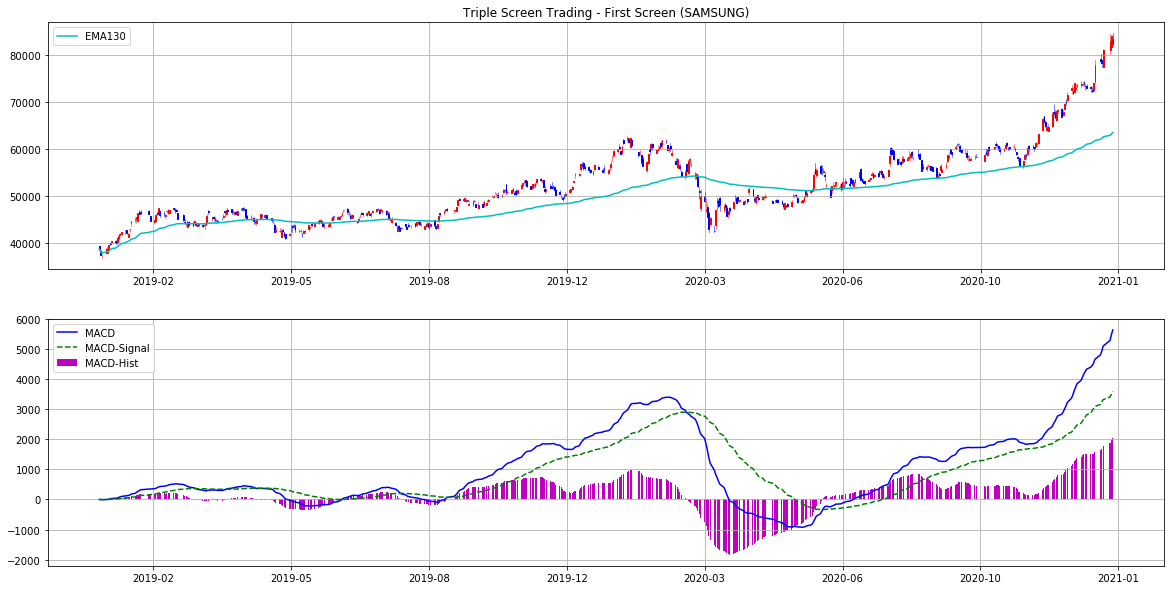

In [9]:
plt.figure(figsize=(20,10))
p1 = plt.subplot(211)
plt.title('Triple Screen Trading - First Screen (SAMSUNG)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=0.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best') 

p2 = plt.subplot(212)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')
plt.show()

----

## * Second Screen - 시장 파도

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('삼성전자', '2019-01-01')

end_date is initialized to '2021-01-09'


In [21]:
ema60 = df.close.ewm(span=60).mean()     # 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean()   # 종가의 26주 지수 이동평균
macd = ema60- ema130                     # MACD선
signal = macd.ewm(span=45).mean()        # 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal                 # MACD 히스토그램

In [22]:
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number', 'open', 'high', 'low', 'close']]

In [23]:
ndays_high = df.high.rolling(window=14, min_periods=1).max()
ndays_low = df.low.rolling(window=14, min_periods=1).min()
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

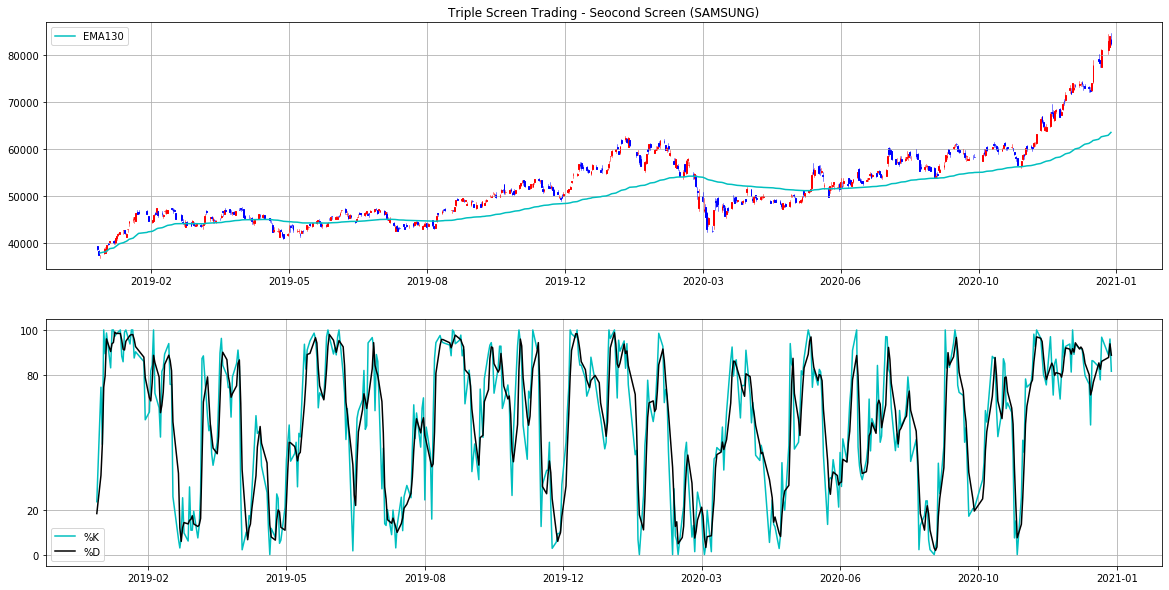

In [24]:
plt.figure(figsize=(20,10))
p1 = plt.subplot(211)
plt.title('Triple Screen Trading - Seocond Screen (SAMSUNG)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=0.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
plt.legend(loc='best') 

p2 = plt.subplot(212)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()

## Third Screen - 진입 기술
- 주간 추세 : 상승 / 오실레이터 : 하락 -> 추적 매수 스탑
- 주간 추세 : 하락 / 오실레이터 : 상승 -> 추적 매도 스탑

|주간 추세|일간 오실레이터|행동|주문|
|:---|:---|:---|:---|
|상승|상승|관망||
|상승|하락|매수|**추적 매수 스탑**|
|하락|하락|관망||
|하락|상승|매도|**추적 매도 스탑**|

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('삼성전자', '2019-01-01')

end_date is initialized to '2021-01-10'


In [26]:
ema60 = df.close.ewm(span=60).mean()     # 종가의 12주 지수 이동평균
ema130 = df.close.ewm(span=130).mean()   # 종가의 26주 지수 이동평균
macd = ema60- ema130                     # MACD선
signal = macd.ewm(span=45).mean()        # 신호선(MACD의 9주 지수 이동평균)
macdhist = macd - signal                 # MACD 히스토그램

In [27]:
df = df.assign(ema130=ema130, ema60=ema60, macd=macd, signal=signal, macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number', 'open', 'high', 'low', 'close']]

In [28]:
ndays_high = df.high.rolling(window=14, min_periods=1).max()
ndays_low = df.low.rolling(window=14, min_periods=1).min()
fast_k = (df.close - ndays_low) / (ndays_high - ndays_low) * 100
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

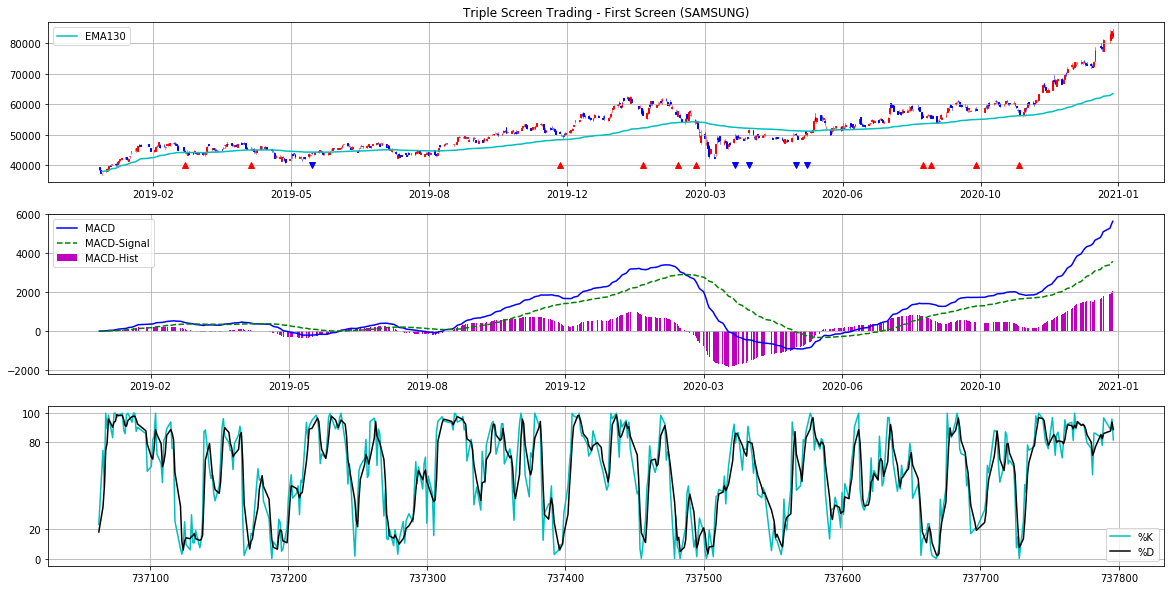

In [29]:
plt.figure(figsize=(20,10))
p1 = plt.subplot(311)
plt.title('Triple Screen Trading - First Screen (SAMSUNG)')
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=0.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
for i in range(1, len(df.close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >=20 and df.slow_d.values[i] < 20:
        plt.plot(df.number.values[i], 40000, 'r^')
    elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <=80 and df.slow_d.values[i] > 80:
        plt.plot(df.number.values[i], 40000, 'bv')
plt.legend(loc='best') 

p2 = plt.subplot(312)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(df.number, df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number, df['macd'], color='b', label='MACD')
plt.plot(df.number, df['signal'], 'g--', label='MACD-Signal')
plt.legend(loc='best')

p3 = plt.subplot(313)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0,20,80,100])
plt.legend(loc='best')
plt.show()